## STATS 210 Lab Assignment 2

### Ran Ju rj133

In [2]:
import math
import numpy as np
from numpy import random
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy import stats
from collections import Counter

#### Problem 1

In [16]:
# mathematically calculation:
joint={(0,0):1/8,(0,1):1/8,(1,0):1/4,(1,1):1/2}
pi0=0
pi1=0
pj0=0
pj1=0
for i in joint:
    if i[0]==0:
        pi0+=joint[i]
    if i[0]==1:
        pi1+=joint[i]
    if i[1]==0:
        pj0+=joint[i]
    if i[1]==1:
        pj1+=joint[i]
miux=pi0*0+pi1*1
miuy=pj0*0+pj1*1
varx=(miux-0)**2*pi0+(miux-1)**2*pi1
vary=(miuy-0)**2*pj0+(miuy-1)**2*pj1
miuxy=joint[(1,1)]*1*1
print("p(i=0)="+str(pi0))
print("p(i=1)="+str(pi1))
print("p(j=0)="+str(pj0))
print("p(j=1)="+str(pj1))
print("p(i=0,j=0)="+str(joint[(0,0)]))
print("p(i=0,j=1)="+str(joint[(0,1)]))
print("p(i=1,j=0)="+str(joint[(1,0)]))
print("p(i=1,j=1)="+str(joint[(1,1)]))

p(i=0)=0.25
p(i=1)=0.75
p(j=0)=0.375
p(j=1)=0.625
p(i=0,j=0)=0.125
p(i=0,j=1)=0.125
p(i=1,j=0)=0.25
p(i=1,j=1)=0.5


In [17]:
#computer simulation
def deter():
    r=random.random()
    if r < 0.125:
        return (0,0)
    elif 0.125<=r<0.25:
        return (0,1)
    elif 0.25<=r< 0.5:
        return (1,0)
    else:
        return (1,1)
vector=[]
joint={}
mx={}
my={}
n=10000
for i in range(n):
    v=deter()
    joint[v]=joint.get(v,0)+1
    mx[v[0]]=mx.get(v[0],0)+1
    my[v[1]]=my.get(v[1],0)+1
    vector.append(v)    
for j in [joint,mx,my]:
    for i in j.keys():
        j[i] = j[i]/n

print('joint pmf: ',joint)
print('P(x): ',mx)
print('P(Y): ',my)

joint pmf:  {(1, 0): 0.2509, (1, 1): 0.494, (0, 0): 0.1291, (0, 1): 0.126}
P(x):  {1: 0.7449, 0: 0.2551}
P(Y):  {0: 0.38, 1: 0.62}


#### Problem 2

In [18]:
# mathematically calculation:
cov=miuxy-miux*miuy
coe=cov/((varx*vary)**0.5)
print("corelation coefficient is "+str(coe))

corelation coefficient is 0.14907119849998599


In [19]:
xsum,ysum,xysum,x2sum,y2sum = 0,0,0,0,0
for v in vector:
    xsum+=v[0]
    ysum+=v[1]
    xysum+=v[0]*v[1]
    x2sum+=v[0]*v[0]
    y2sum+=v[1]*v[1]
miux=xsum/n
miuy=ysum/n
vx=x2sum/n-miux**2
vy=y2sum/n-miuy**2
coe1=(xysum/n-miux*miuy)/math.sqrt(vx*vy)
print("corelation coefficient is "+str(coe1))
print("error: "+str(abs((coe-coe1)/coe)))

corelation coefficient is 0.1520026600240423
error: 0.019664841723645216


#### Problem 3

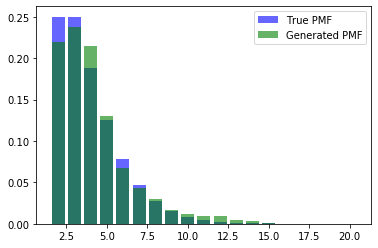

In [48]:
p=0.5
size=100
x=np.random.geometric(p, size)
y=np.random.geometric(p, size)
z=[]
kn=[]
num=[]
ptrue=[]
for i in range(size):
    for j in range(size):
        a=x[i]+y[j]
        z.append(a)
b=Counter(z)
k=sorted(b.keys())
for i in k:
    kn.append(i)
    num.append(b[i]/size**2)
    jp=0.5**2*(i-1)*(1-p)**(i-2)
    ptrue.append(jp)
plt.bar(k,ptrue,width=0.8,alpha=0.6,color='b',label='True PMF')
plt.bar(k,num,width=0.8,alpha=0.6,color='g',label='Generated PMF')
plt.legend(loc='upper right')

Text(0.5, 1.0, 'Generated PMF')

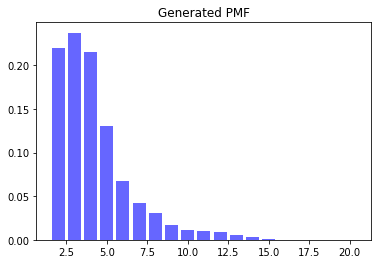

In [49]:
plt.bar(k,num,width=0.8,alpha=0.6,color='b')
plt.title("Generated PMF")

Text(0.5, 1.0, 'True PMF')

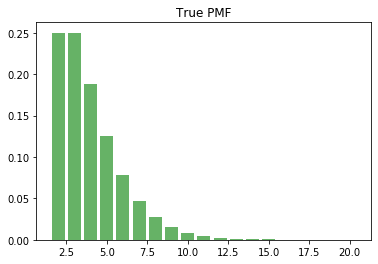

In [50]:
plt.bar(k,ptrue,width=0.8,alpha=0.6,color='g')

plt.title("True PMF")

#### Problem 4

Text(0.5, 1.0, 'The original')

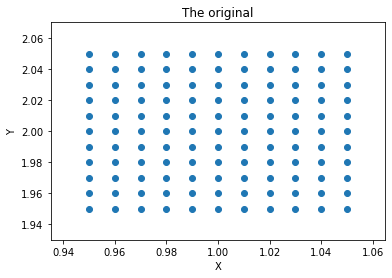

In [55]:
x=[]
y=[]
wx=[]
wy=[]
for i in range(1,12):
    for j in range(1,12):
        x1=0.95+(i-1)/100
        y1=1.95+(j-1)/100
        x2=x1**2+5*(y1**2)
        y2=(-5)*(x1**2)+y1**2
        x.append(x1)
        y.append(y1)
        wx.append(x2)
        wy.append(y2)
ax=plt.subplot()
ax.scatter(x,y)
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.title("The original")



In [56]:
xo=max(x)-min(x)
yo=max(y)-min(y)
so=xo*yo
so

0.009999999999999995

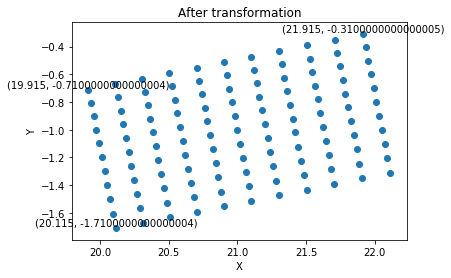

<Figure size 7.2e+06x7.2e+06 with 0 Axes>

In [57]:
ax1=plt.subplot()
ax1.scatter(wx,wy)
ax1.set_ylabel('Y')
ax1.set_xlabel('X')
plt.title("After transformation")
for a, b in zip(wx[110:111], wy[110:111]):  
    plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
for a, b in zip(wx[0:1], wy[0:1]):  
    plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
for a, b in zip(wx[10:11], wy[10:11]):  
    plt.text(a, b, (a,b),ha='center', va='bottom', fontsize=10)
plt.figure(figsize=(100000,100000))
plt.show()


In [58]:
x1,y1=21.915,-0.3100000000000005
x2,y2=19.915,-0.7100000000000004
x3,y3=20.115,-1.7100000000000004
xl=((x2-x1)**2+(y2-y1)**2)**0.5
yl=((x2-x3)**2+(y2-y3)**2)**0.5
s=xl*yl
s


2.0799999999999996

In [60]:
result=s/so
result

208.00000000000006

In [61]:
print("error: "+str(abs(result-208)/208))

error: 2.7328566760003855e-16


#### Problem 5

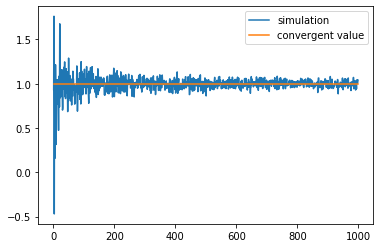

In [65]:
mu, sigma = 1, 1 # mean and standard deviation
x=[]
meanlist=[]
li=[]
for n in range(1,1000):
    s=np.random.normal(mu, sigma, n)
    mean=sum(s)/n
    x.append(n)
    meanlist.append(mean)
    li.append(1)
plt.plot(x,meanlist,label='simulation')
plt.plot(x,li,label='convergent value')
plt.legend(loc='upper right')

#### Problem 6

Text(0.5, 1.0, 'Uniform distribution')

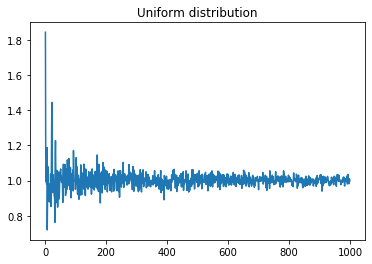

In [66]:
x1=[]
meanlist1=[]
for n in range(1,1000):
    s=np.random.uniform(0, 2, n)
    mean=sum(s)/n
    x1.append(n)
    meanlist1.append(mean)
plt.plot(x1,meanlist1)
plt.title('Uniform distribution')

Text(0.5, 1.0, 'Normalm distribution')

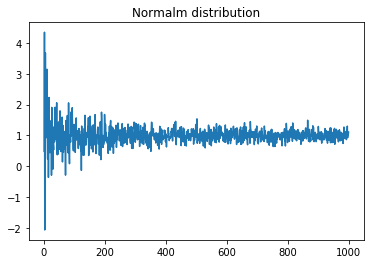

In [67]:
mu,sigma=1,4 # mean and standard deviation
x2=[]
meanlist2=[]
for n in range(1,1000):
    s=np.random.normal(mu, sigma, n)
    mean=sum(s)/n
    x2.append(n)
    meanlist2.append(mean)
plt.plot(x2,meanlist2)
plt.title('Normalm distribution')

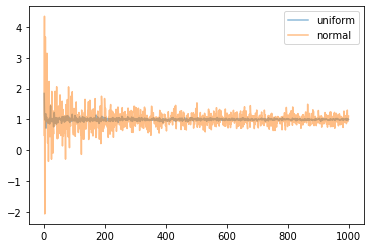

In [68]:
ax = plt.axes()
ax.plot(x1,meanlist1,label='uniform',alpha=0.5)
ax.plot(x2,meanlist2,label='normal',alpha=0.5)
plt.legend(loc='upper right')